Tamanho do conjunto de treino: 105 instâncias
Tamanho do conjunto de teste: 45 instâncias


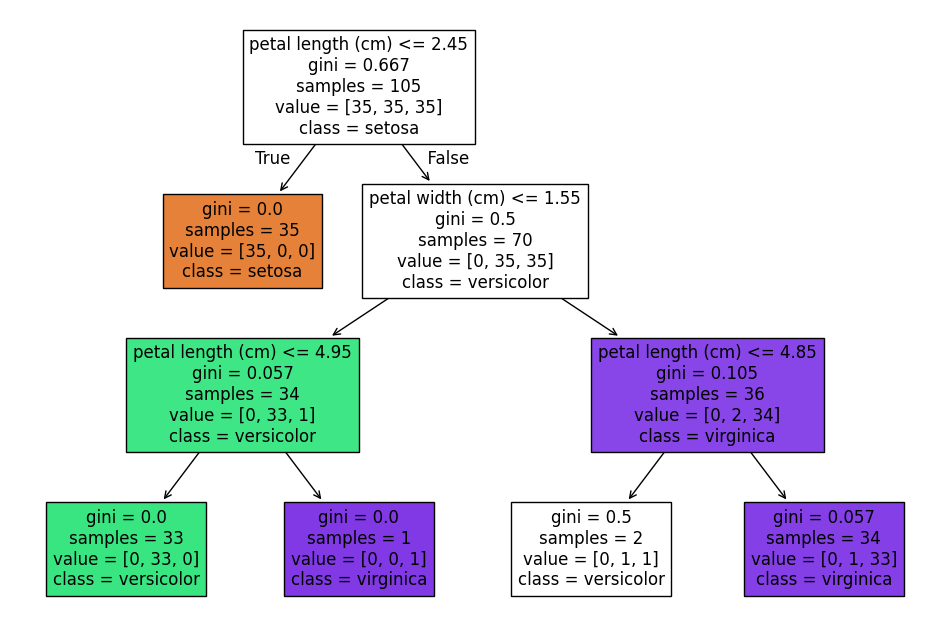

Acurácia: 0.9333333333333333
Matriz de Confusão:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


Parâmetros: max_depth=2, criterion='gini'
Acurácia: 0.8888888888888888
Matriz de Confusão:
 [[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.80      0.83        15
           2       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg      

In [1]:
# Importando o Iris dataset do scikit-learn
from sklearn.datasets import load_iris
import pandas as pd

# Carregando o dataset
iris = load_iris()

# Criando um DataFrame com os dados
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adicionando a coluna 'target' ao DataFrame
df['target'] = iris.target

# Visualizando as primeiras linhas do dataset
df.head()

# Importando a função train_test_split
from sklearn.model_selection import train_test_split

# Separando as features (X) e o target (y)
X = df.drop('target', axis=1)  # Dados (features)
y = df['target']  # Classes (target)

# Dividindo os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificando o tamanho dos conjuntos de treino e teste
print(f"Tamanho do conjunto de treino: {len(X_train)} instâncias")
print(f"Tamanho do conjunto de teste: {len(X_test)} instâncias")


# Importando a Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Inicializando o modelo com o critério Gini e profundidade máxima de 3
model = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Visualizando a Árvore de Decisão
plt.figure(figsize=(12, 8))  # Ajustando o tamanho da visualização
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=iris.target_names)
plt.show()


# Importando as métricas necessárias
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


# Função para treinar e avaliar o modelo com diferentes parâmetros
def avaliar_arvore(max_depth, criterion):
    # Inicializando o modelo com os parâmetros dados
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)

    # Treinando o modelo
    model.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = model.predict(X_test)

    # Avaliando o desempenho do modelo
    print(f"\nParâmetros: max_depth={max_depth}, criterion='{criterion}'")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
    print("__________________________________________________________________________")
# Testando diferentes valores de max_depth com o critério 'gini'
for depth in [2, 3, 5, 10]:
    avaliar_arvore(max_depth=depth, criterion='gini')

# Testando diferentes valores de max_depth com o critério 'entropy'
for depth in [2, 3, 5, 10]:
    avaliar_arvore(max_depth=depth, criterion='entropy')

